# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023

#### Popis EKG

#### EKG ve spektru

In [ ]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xmacha86.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav



--2023-12-17 11:19:22--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xmacha86.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xmacha86.wav’

xmacha86.wav        100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 11:19:24 (120 MB/s) - ‘xmacha86.wav’ saved [10044/10044]

--2023-12-17 11:19:24--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav’

FIB.wav             100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 11:1

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

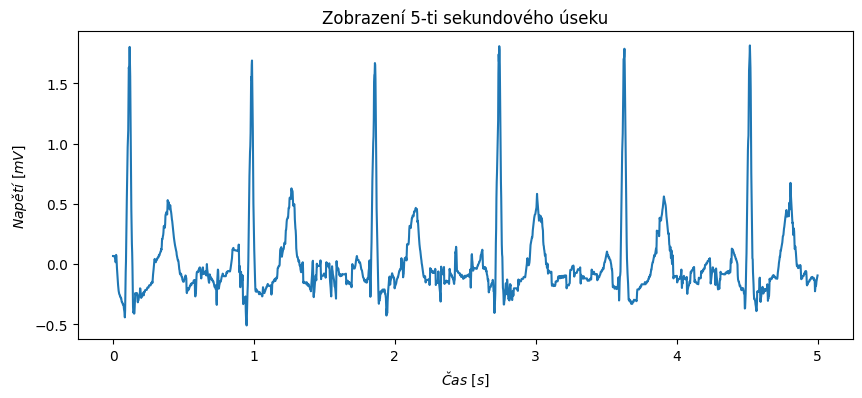

In [ ]:
# Zde napište váš kód
import numpy as np
import matplotlib.pyplot as plt
y_axis, fs = sf.read("xmacha86.wav")  #y_axis obsahuje samotny nahrany signal
                                      #fs obsahuje vzorkovaci frekvenci nahraneho signalu (urcuje pocet vzorku za jednotku casu)
y_mV = y_axis * 100   #převod na mV

# Výběr 5 sekundového úseku
num_samples = 5 * fs  #Chceme zobrazit 5 sekund, tedy potrebujeme zjistit kolik vzorku bude za 5 sekund
#pokud fs obsahuje pocet vzorku za 1 sekundu, staci vynasobit 5

y_axis_mV = y_mV[:num_samples] #Ziskame z nahraneho signalu pocet vzorku odpovidajici 5 sekundam
#zde jsem si nebyl jisty, kterych 5 sekund jsme meli zvolit, proto jsem zvolil prvnich 5

# Vytvoření časové osy pro segment
time_axis = np.linspace(0, 5, num=num_samples) #Vytvorime si horizontalni osu od 0 do 5 pro cas

# Vykreslení grafu
plt.figure(figsize=(10, 4))     #vyska a sirka grafu
plt.plot(time_axis, y_axis_mV)  #vyobrazeni osy x osy y
plt.xlabel('$Čas\ [s]$')  #Popis horiz. osy
plt.ylabel('$Napětí\ [mV]$')  #Popis vertik. osy
plt.title('Zobrazení 5-ti sekundového úseku') #popis grafu
plt.show() #zobrazeni grafu



b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

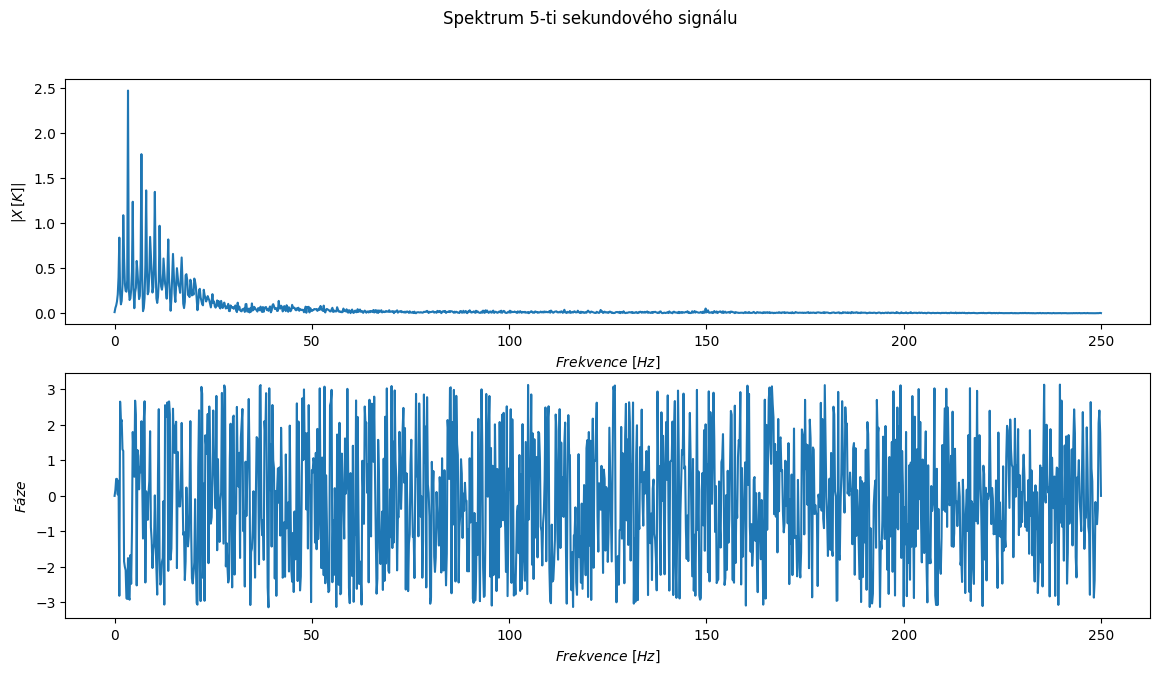

In [ ]:
# Zde napište váš kód
#y_axis_mV obsahuje 5ti sekundovy vyber nahraneho signalu (jednotky mV)

#ziskame opet 5ti sekundovy signal (predtim jsme jej upravovali na jednotky mV, ted uz bez upravy)
signal_5sec_spectr = y_axis[:num_samples]

#analyza
  #budeme potrebovat nekolik promennych
half = np.arange(0,int(num_samples/2) + 1)  #vezmeme pouze polovinu spektra (horni polovina je zrcadlove obracena a ma opacne faze)
freq = half / num_samples * fs              #frekvence pro vykresleni grafu

#analyza
X = np.fft.fft(signal_5sec_spectr) #ziskame dft naseho signalu
Xmag = np.abs(X[half])    #ziskame aboslutni hodnoty komplexnich cisel (jejich velikosti)
Xphas = np.angle(X[half]) #ziskame faze

#plot grafu
fig, ax = plt.subplots(2,1, figsize=(14,7))
fig.suptitle('Spektrum 5-ti sekundového signálu')
ax[0].plot(freq, Xmag)
ax[0].set_xlabel('$Frekvence\ [Hz]$')
ax[0].set_ylabel('$|X\,[K]|$')
ax[1].plot(freq, Xphas)
ax[1].set_xlabel('$Frekvence\ [Hz]$')
ax[1].set_ylabel('$Fáze$')
plt.show()


 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Nejčastějším důvodem bývá elektromagnetické rušení. Může být například z důvodu blízkého umístění k jiným elektronickým zařízením nebo například nedostatečná izolace, která vede k vyšší citlivosti vůči vnějším elektromagnetickým rušením.
Výjimečně se stává, že elektrody jsou špatně uchyceny na pacientovi, nebo pohyb pacienta vede k rušení signálu.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [ ]:
# Zde napište váš kód
import numpy as np
from scipy.signal import butter, filtfilt, freqz, tf2zpk #import knihoven pro filtraci dolni propusti

  #potrebne promenne
targeted_fs = 100 #nase vysledna vzorkovaci frekvence
step = int(fs / targeted_fs)  #krok -> kolikate vzorky budeme vzdy brat

  #vyber danych prvku
resampled_signal = y_axis[::step] #vyber vzorku vzdalenych od sebe o step
resampled_signal_mV = resampled_signal * 100 #prevedeme na mV
  #priprava promennych potrebnych pro sestaveni filtru dolni propusti
nyquist_freq = 0.5 * fs #ziskame nyquistovu frekvenci (polovina vzorkovaci frekvence, maximální frekvence, kterou je mozne v signalu bez chyby zachytit pri dane vzorkovaci frekvenci)

#spustime na prevzorkovany signal filtr dolni propusti (Butterworthuv)
  #params
  #5 - rad filtru (efektivnejsi odstraneni frekvenci nad targeted_fs)
  #nyquist_freq
  #btype - specifikace, ze se jedna o dolni propust
b, a = butter(5, targeted_fs / nyquist_freq, btype='low')
  #b - definice nulovych bodu filtru
  #a - definice polu filtru
filtered_signal = filtfilt(b, a, resampled_signal_mV) #vyfiltrujeme dany signal




b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

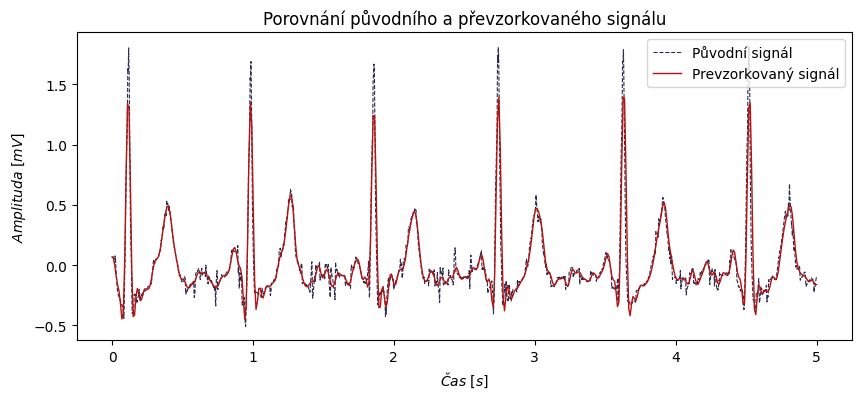

In [ ]:
# Zde napište váš kód
  #priprava potrebnych promennych
num_samples_res = 5 * targeted_fs #ziskame pocet vzorku za 5 sekund
filtered_signal_5sec = filtered_signal[:num_samples_res] #ziskame pocet vzorku z vyfiltrovaneho signalu odpovidajici 5ti sekundam
time_axis_res = np.linspace(0, 5, num=num_samples_res) #vytvorime casovou osu pro prevzorkovany signal odpovidajici 5 sekundam

  #vyobrazeni do grafu
plt.figure(figsize=(10,4))
plt.plot(time_axis, y_axis_mV, color = '#2B2A4C', label = 'Původní signál', linestyle='--', linewidth=0.8)
plt.plot(time_axis_res, filtered_signal_5sec, color = '#B31312', label = 'Prevzorkovaný signál', linewidth = 1)
plt.title('Porovnání původního a převzorkovaného signálu')
plt.xlabel('$Čas\ [s]$')
plt.ylabel('$Amplituda\ [mV]$')
plt.legend()
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

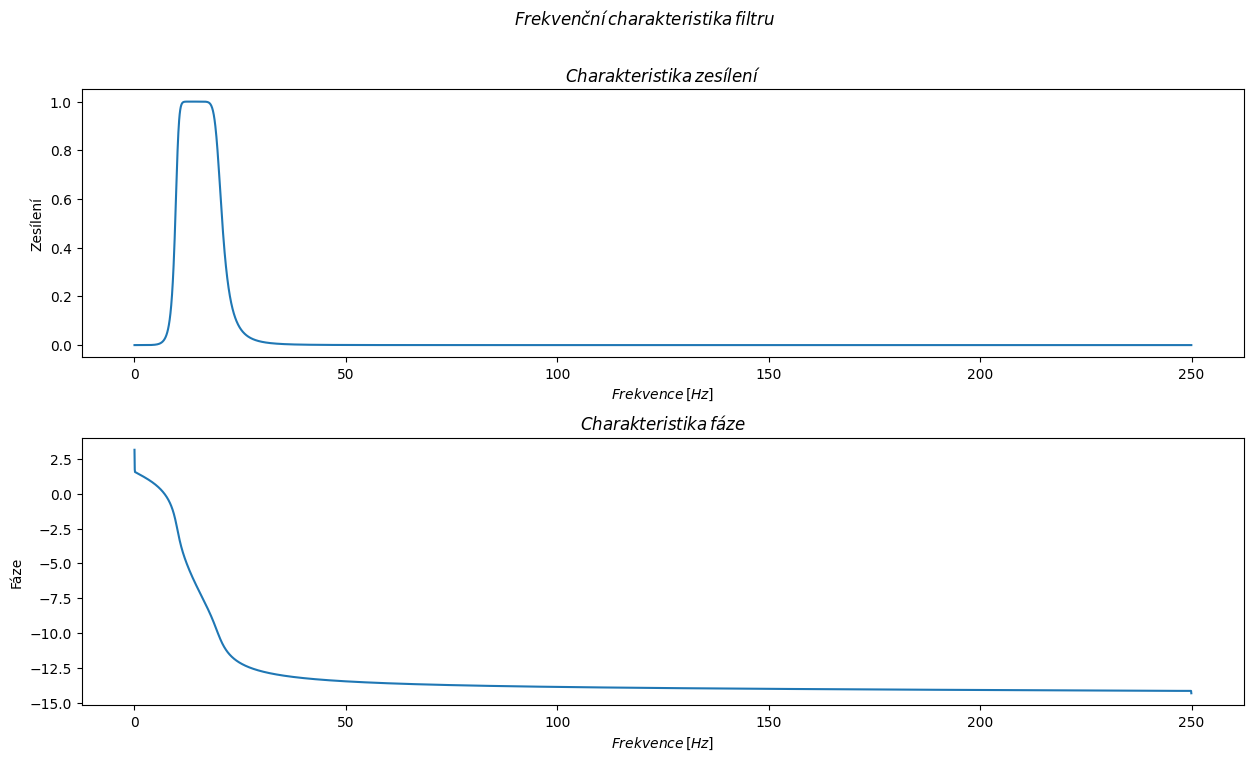

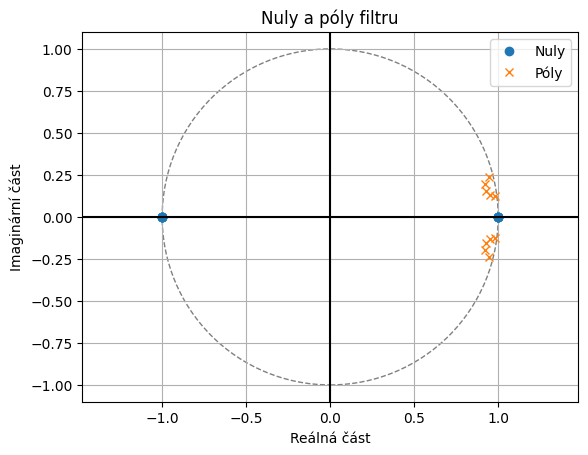

In [ ]:
# Zde napište váš kód
  #priprava promennych
lowcut = 10 #spodni hranice
highcut = 20 #horni hranice
  #priprava potrebnych parametru
b, a = butter(5, [lowcut, highcut], btype='bandpass', fs=fs)  #pripravime si jednotlive parametry potrebne pro funkci filtfilt (nuly a poly z transformovaneho filtru)
#vypocteme frekvencni odezvu filtru
w, h = freqz(b, a, worN=4000)

#prevedeme frekvenci na Hz
freq = w * fs / (2 * np.pi)
phase = np.unwrap(np.angle(h))
#ziskame nuly a poly filtru
z, p, k = tf2zpk(b, a)

fig, ax = plt.subplots(2,1, figsize=(15,8))
fig.suptitle('$Frekvenční\,charakteristika\,filtru$')
ax[0].plot(freq, np.abs(h))
ax[0].set_xlabel('$Frekvence\,[Hz]$')
ax[0].set_ylabel('Zesílení')
ax[0].set_title('$Charakteristika\,zesílení$')
ax[1].plot(freq, phase)
ax[1].set_xlabel('$Frekvence\,[Hz]$')
ax[1].set_ylabel('Fáze')
ax[1].set_title('$Charakteristika\,fáze$')
plt.subplots_adjust(hspace = 0.3)
plt.show()

plt.figure()
plt.plot(np.real(z), np.imag(z), 'o', label='Nuly')
plt.plot(np.real(p), np.imag(p), 'x', label='Póly')

unit_circle = plt.Circle((0,0), radius=1, color='gray', linestyle='--', fill=False)
plt.gca().add_patch(unit_circle)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Reálná část')
plt.ylabel('Imaginární část')
plt.title('Nuly a póly filtru')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


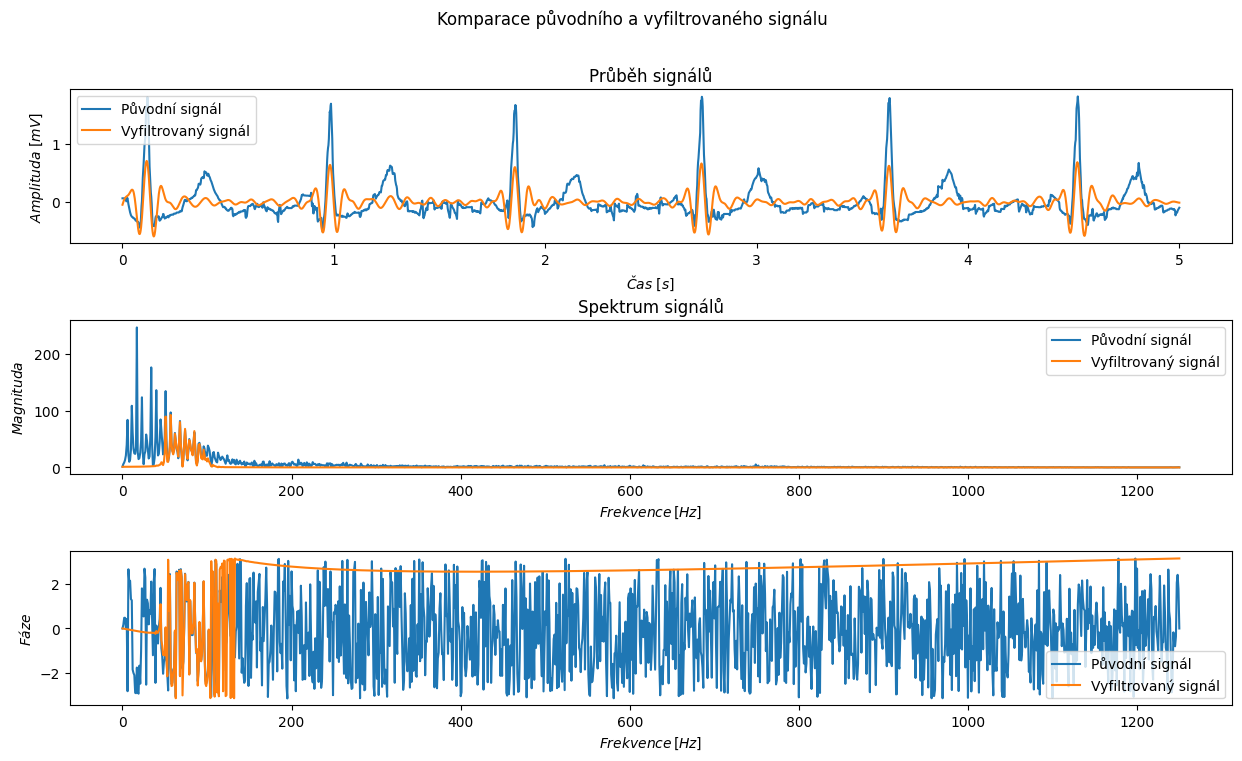

In [ ]:
# Zde napište váš kód
  #aplikace navrzeneho filtru na nahrany signal (s upravenou osou y na jednotky mV)
filtered_signal_bandpass = filtfilt(b, a, y_mV) #provedeme filtrovani z obou stran

#pro lepsi zobrazeni vybereme pouze 5ti sekundove useky
filtered_signal_bandpass_5sec = filtered_signal_bandpass[:num_samples] #ziskame 5ti sek usek
#spocitame spektra
X_filtered=np.fft.fft(filtered_signal_bandpass_5sec)
X_filt_Mag=np.abs(X_filtered[half])
X_filt_Ang=np.angle(X_filtered[half])

X_orig=np.fft.fft(y_axis_mV)
X_orig_Mag=np.abs(X_orig[half])
X_orig_Ang=np.angle(X_orig[half])

freq_temp = np.linspace(0, 5, num=1251)


  #vyobrazime puvodni a vyfiltrovany signal
fig, ax = plt.subplots(3,1, figsize=(15,8))
fig.suptitle('Komparace původního a vyfiltrovaného signálu')
ax[0].plot(time_axis, y_axis_mV, label='Původní signál')
ax[0].plot(time_axis, filtered_signal_bandpass_5sec, label='Vyfiltrovaný signál')
ax[0].set_xlabel('$Čas\ [s]$')
ax[0].set_ylabel('$Amplituda\ [mV]$')
ax[0].set_title('Průběh signálů')
ax[0].legend()
ax[1].plot(X_orig_Mag, label='Původní signál')
ax[1].plot(X_filt_Mag, label='Vyfiltrovaný signál')
ax[1].set_title('Spektrum signálů')
ax[1].set_xlabel('$Frekvence\,[Hz]$')
ax[1].set_ylabel('$Magnituda$')
ax[1].legend()
ax[2].plot(X_orig_Ang, label='Původní signál')
ax[2].plot(X_filt_Ang, label='Vyfiltrovaný signál')
ax[2].set_xlabel('$Frekvence\,[Hz]$')
ax[2].set_ylabel('$Fáze$')
ax[2].legend()
plt.subplots_adjust(hspace = 0.5)
plt.show()


  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



Původní signál obsahuje všechny frekvenční složky, které se v nahrávce nacházejí. Vyfiltrovaný signál obsahuje pouze ty frekvenční složky, které jsou v rozmezí intervalu dolní hranice a horní hranice filtru pásmové propusti. V tomto případě tedy v rozmezí 10 až 20 Hz. Teoreticky největší možné posunutí je rovna délce filtru mínus 1. Je to z důvodu, že výstupní signál je zpožděn o hodnotu odpovídající délce filtru - 1.

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

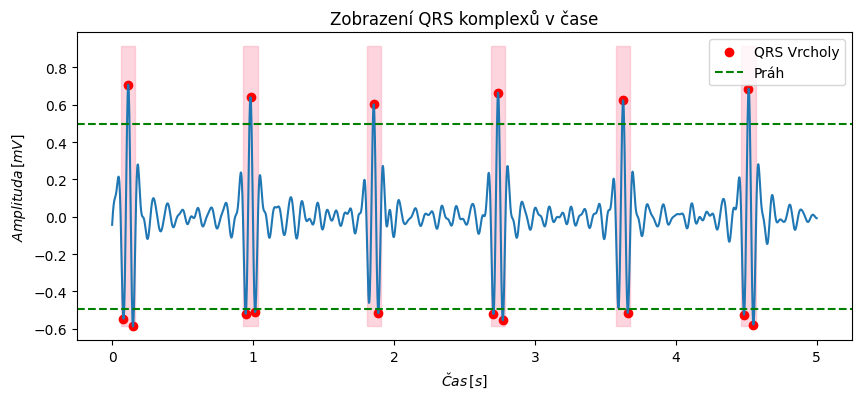

In [ ]:
# Zde napište váš kód
import matplotlib.patches as patches
# priprava potrebnych promennych
amplitude = max(filtered_signal_bandpass_5sec) #maximalni amplituda signalu
threshold_value = 0.7 * amplitude #jako prah zvolime 0.7 nasobek maximalni amplitudy
peaks = [] #pole pro ulozeni peaku signalu
start_idx = 0 #zacinajici index
above_threshold = False #bool promenna udavajici, zda-li je dana hodnota nad prahem
rect_width = 0.1 #sirka obdelniku pro vyznaceni QRS komplexu
rect_height = 1.5 #vyska obdelnikuy pro vyznaceni QRS komplexu

# samotne hledani QRS komplexu
for i, value in enumerate(filtered_signal_bandpass_5sec): #prochazime jednotlive prvky od daneho indexu
    if value > threshold_value or value < -threshold_value: #pokud dana hodnota odpovida peaku QRS komplexu
        if not above_threshold: #pokud jeste nejsme nad prahem
            above_threshold = True #nastavime prah na true
            start_idx = i #uchovame index zacatku odpovidajicih vzorku
    elif above_threshold: #pokud jiz jsme nad prahem
        above_threshold = False #nastavime prah na false
        peak_idx = np.argmax(np.abs(filtered_signal_bandpass_5sec[start_idx:i])) + start_idx #nalezneme nejvyssi hodnotu v nami doposud nalezenych hodnotach odpovidajici peaku
        peaks.append(peak_idx) #vlozime index peaku do pole peaku
# shrnuti: jakmile se dostaneme nad prah, uchovame tento index a pokracujeme po singalu dale, dokud se nedostaneme pod prah, oznacime si tento index
# potom mame pole vzorku odpovidajicich peakum QRS komplexu, kdy vybereme pouze nejvetsi/nejmensi z nich
peaks_sized = [peak / fs for peak in peaks]

plt.figure(figsize=(10, 4))
plt.plot(time_axis, filtered_signal_bandpass_5sec)
for peak in peaks: #projdeme jednotlive peaky
  if filtered_signal_bandpass_5sec[peak] > 0: #abychom ke kazdemu komplexu nedostali 3 obdelniky, vyobrazime je pouze pro ty peaky, ktere jsou v kladne casti osy
    start_rec = (peak / fs) - (rect_width / 2) #vypocitame zacatek obdelniku vuci kazdemu peaku
    rect = patches.Rectangle((start_rec, min(filtered_signal_bandpass_5sec)), rect_width, rect_height, color='#FBACBE', alpha=0.5) #vlozime ke kazdemu peaku vyznacujici obdelnik
    plt.gca().add_patch(rect) #pridani obdelniku do grafu
plt.scatter(peaks_sized, filtered_signal_bandpass_5sec[peaks], color='red', label='QRS Vrcholy')
plt.xlabel('$Čas\,[s]$')
plt.ylabel('$Amplituda\,[mV]$')
plt.axhline(y=threshold_value, color='green', linestyle='--', label='Práh')
plt.axhline(y=-threshold_value, color='green', linestyle='--')
plt.title('Zobrazení QRS komplexů v čase')
plt.legend()
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

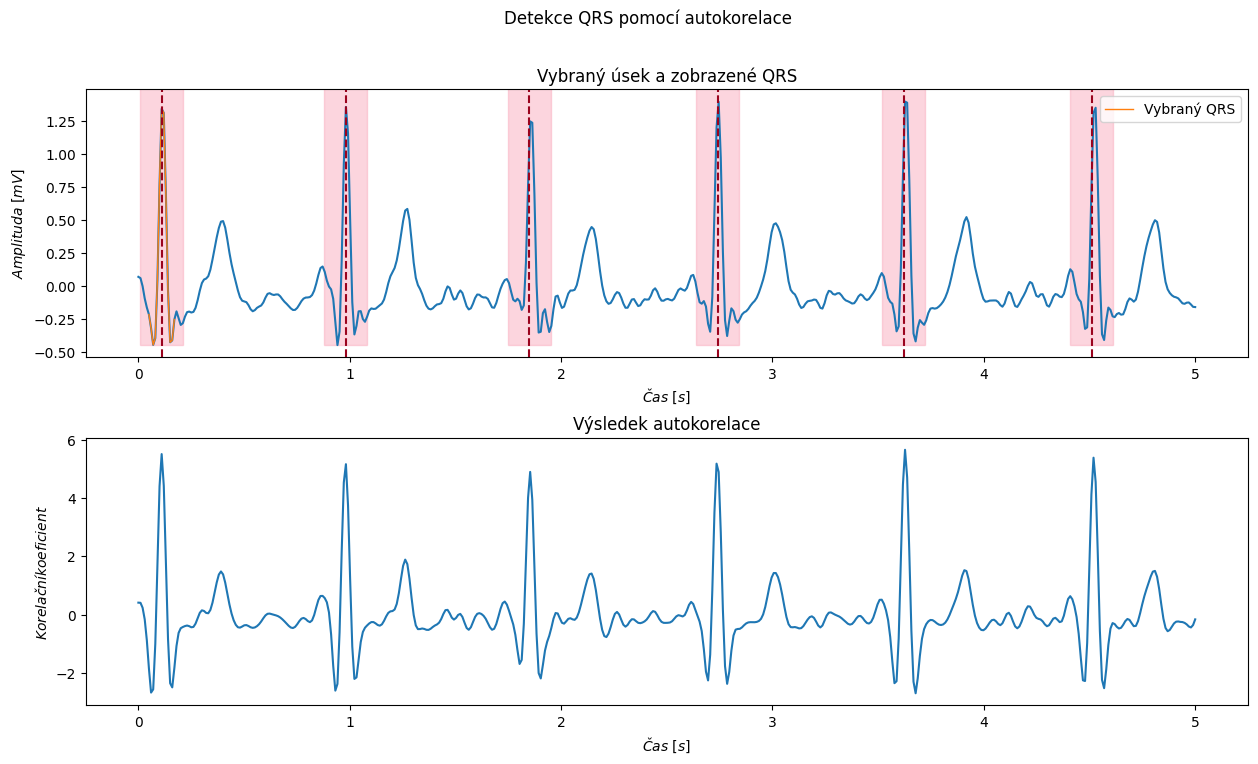

In [ ]:
# Zde napište váš kód
#priprava potrebnych promennych
index_start = 5 #index zacatku vyberu
index_end = 18 #index konce vyberu (voleno podle citu)
qrs_complex_picked = filtered_signal_5sec[index_start:index_end] #samotny vyber casti
qrs_complex_axis = np.arange(index_start, index_end) / targeted_fs #vypocet osy x pro zobrazeni vyberu QRS v ramci casul
peaks_cor = [] #vysledne nalezene QRS complexy na zaklade autokorelace
min_distance = 10 #minimalni vzdalenost dvou vrcholu QRS kompolexu (pro odstraenni falsenych pozitiv)
rect_cor_width = 0.2
rect_cor_height = 2

#provedeni korelace
res_of_corellation = np.correlate(filtered_signal_5sec, qrs_complex_picked, mode='same')
max_amplitude = np.max(res_of_corellation) #vezmeme nejvetsi mozny vysledek korelace
corellation_threshold = max_amplitude * 0.85 #nastavime prah pro vyber vsech bodu odpovidajich hodnote 0.8 krat nasobek max amplitudy

peaks = np.where(res_of_corellation > corellation_threshold)[0] #vybereme body odpovidajici podmince
#je treba pouzit stejny trik jako u predchoziho, protoze muzeme dostat falesne pozitiva
#tyto falesne pozitiva je nasledne nutne odstranit
#porovname vzdy sousedni indexy mezi sebou, pokud jsou v dostatence vzdalenosti, pridame je do vysledneho pole
for i in range(len(peaks) - 1):
    # bool hodnota pro predcasne ukonceni vnitrniho cyklu
    far_enough = True
    for n in range(i + 1, len(peaks)):
        distance = np.abs(peaks[n] - peaks[i])
        if distance < min_distance:
            far_enough = False
            break  #pokud je nejaky vrchol moc blizko, prerusime smycku

    # pokud je dostatence daleko pridame jej do vysledneho pole indexu
    if far_enough:
        peaks_cor.append(peaks[i])

# Pridani poslendiho vrcholu, protoze jako jediny nebyl s nicim porovnavan
peaks_cor.append(peaks[-1])


fig, ax = plt.subplots(2,1, figsize=(15,8))
fig.suptitle('Detekce QRS pomocí autokorelace')
ax[0].plot(time_axis_res, filtered_signal_5sec)
ax[0].plot(qrs_complex_axis, qrs_complex_picked, linewidth = 1, label='Vybraný QRS')
ax[0].set_xlabel('$Čas\ [s]$')
ax[0].set_ylabel('$Amplituda\ [mV]$')
ax[0].set_title('Vybraný úsek a zobrazené QRS')
for peak in peaks_cor:
    ax[0].axvline(x=peak/targeted_fs, color='#9A031E', linestyle='--')
    start_rec = (peak / targeted_fs) - (rect_cor_width / 2) #vypocitame zacatek obdelniku vuci kazdemu peaku
    rect = patches.Rectangle((start_rec, min(filtered_signal_5sec)), rect_cor_width, rect_cor_height, color='#FBACBE', alpha=0.5) #vlozime ke kazdemu peaku vyznacujici obdelnik
    ax[0].add_patch(rect) #pridani obdelniku do grafu
ax[0].legend()
ax[1].plot(time_axis_res, res_of_corellation)
ax[1].set_xlabel('$Čas\ [s]$')
ax[1].set_ylabel('$Korelační koeficient$')
ax[1].set_title('Výsledek autokorelace')
plt.subplots_adjust(hspace = 0.3)
plt.show()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

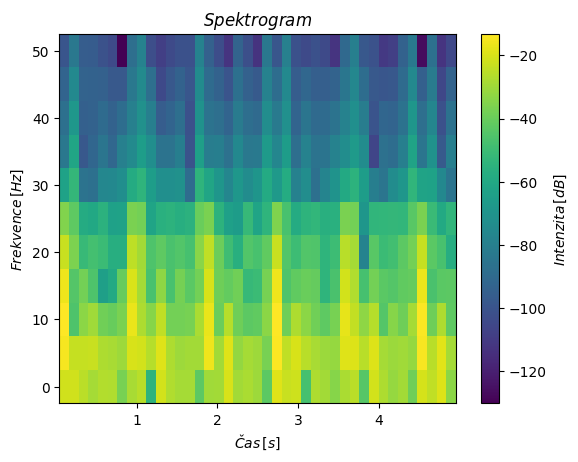

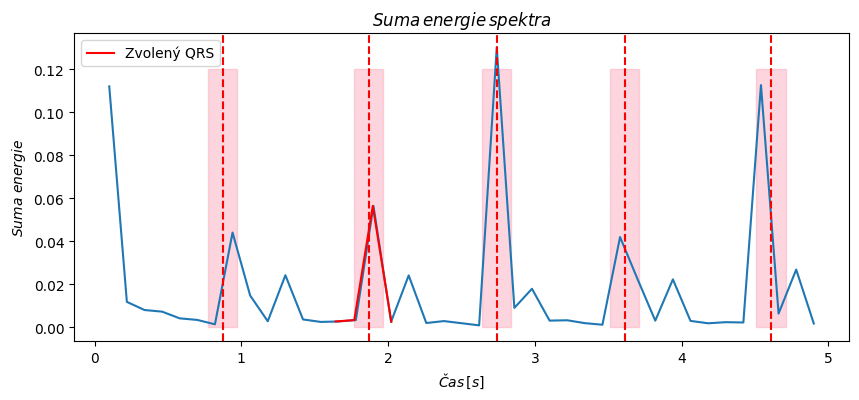

In [ ]:
# Zde napište váš kód
#priprava jednotlivych promennych
hop_size = int(0.12 * targeted_fs) #odpovidaji delkam posunuti okna fft
window_len = int(0.2 * targeted_fs)
rect_spectro_width = 0.2
rect_spectro_height = 0.12

#dostaneme spektrum, frekvenci a cas
Sxx, f, t, im = plt.specgram(filtered_signal_5sec, NFFT=window_len, Fs=targeted_fs, noverlap=window_len - hop_size)

plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.colorbar(label='$Intenzita\,[dB]$')
plt.xlabel('$Čas\,[s]$')
plt.ylabel('$Frekvence\,[Hz]$')
plt.title('$Spektrogram$')
plt.show()

energy = np.sum(Sxx, axis=0) #vypocet sumy energie
#zvolime nejaky QRS
spectro_QRS = energy[13:17] #vybereme usek s QRS signalem
spectro_axis = np.arange(13, 17) / len(f) * 1.39 #tady nebudu lhat, ale absolutne nevim, kde sem prisel na 1.39, but if it works it works
max_amplitude_spectro = np.max(spectro_QRS) #vybereme max hodnotu
spectro_threshold = max_amplitude_spectro * 0.7
spectro_peaks = np.where(energy > spectro_threshold)[0] #vybereme vsechny peaky odpovidajici podmince
spectro_peaks_all = spectro_peaks[1:]

# Zobrazení sumy energie spektra
plt.figure(figsize=(10, 4))
plt.plot(t, energy)
for peak in spectro_peaks_all:
  plt.axvline(x=peak / len(f) * 1.37, linestyle='--', color='red')
  start_rec = (peak / len(f) * 1.37) - (rect_spectro_width / 2) #vypocitame zacatek obdelniku vuci kazdemu peaku
  rect = patches.Rectangle((start_rec, 0), rect_spectro_width, rect_spectro_height, color='#FBACBE', alpha=0.5) #vlozime ke kazdemu peaku vyznacujici obdelnik
  plt.gca().add_patch(rect) #pridani obdelniku do grafu
plt.xlabel('$Čas\,[s]$')
plt.ylabel('$Suma\ energie$')
plt.title('$Suma\,energie\,spektra$')
plt.plot(spectro_axis, spectro_QRS, color='red', label='Zvolený QRS')
plt.legend()
plt.show()

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.


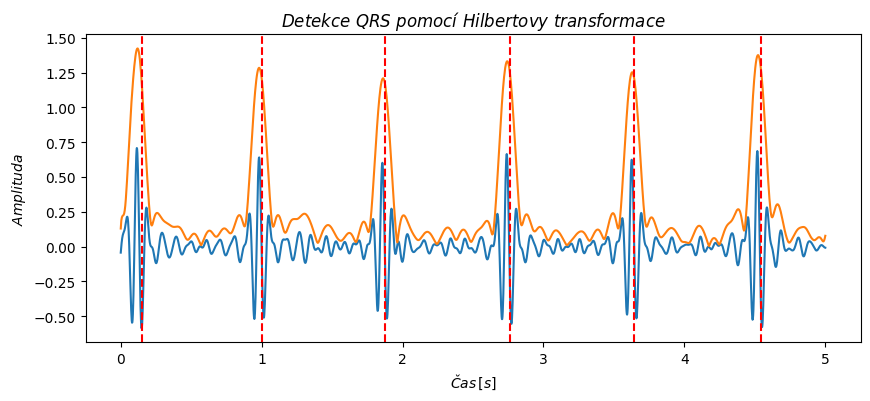

In [ ]:
# Zde napište váš kód
num_samples_hilb = len(filtered_signal_bandpass_5sec) #pocet vzorku signalu
odd = False
if num_samples_hilb % 2 == 0:
  odd = True
X_hilb = np.fft.fft(filtered_signal_bandpass_5sec) #spocitame fft
X_hilb_half = X_hilb[:int(num_samples_hilb / 2) + 1] #zahodime horni cast spektra
if odd:
  X_hilb_adjusted = X_hilb_half[1:-1] * 2
elif not odd:
  X_hilb_adjusted = X_hilb_half[0:] * 2

X_hilb_inv = np.fft.ifft(X_hilb_adjusted)

time_axis_hilb = np.linspace(0, 5, num=1249) #osa x pro plot

hilb_amplitude = max(np.abs(X_hilb_inv))
hilb_threshold = hilb_amplitude * 0.8
min_distance_hilb = 10
peaks_hilb = np.where(np.abs(X_hilb_inv) > hilb_threshold)[0]
peaks_hilb_all = []

#ponechame kazdy QRS peak oznaceny pouze jednou
for i in range(len(peaks_hilb) - 1):
    # bool hodnota pro predcasne ukonceni vnitrniho cyklu
    far_enough = True
    for n in range(i + 1, len(peaks_hilb)):
        distance = np.abs(peaks_hilb[n] - peaks_hilb[i])
        if distance < min_distance_hilb:
            far_enough = False
            break  #pokud je nejaky vrchol moc blizko, prerusime smycku

    # pokud je dostatence daleko pridame jej do vysledneho pole indexu
    if far_enough:
        peaks_hilb_all.append(peaks_hilb[i])
# Pridani poslendiho vrcholu, protoze jako jediny nebyl s nicim porovnavan
peaks_hilb_all.append(peaks_hilb[-1])
plt.figure(figsize=(10, 4))
plt.plot(time_axis, filtered_signal_bandpass_5sec, label='Původní signál')
plt.plot(time_axis_hilb, np.abs(X_hilb_inv), label='Obálka')
plt.title('$Detekce\ QRS\ pomocí\ Hilbertovy\ transformace$')
plt.xlabel('$Čas\,[s]$')
plt.ylabel('$Amplituda$')
for peak in peaks_hilb_all:
  plt.axvline(x=peak/250, linestyle='--', color='red')
plt.show()

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

Při používání prahové metody může dojít k nenalezení QRS komplexu z důvodu, že se nachází pod prahem se záporným znaménkem. Metoda založená na výpočtu energie není ovlivněna natočením signálu, protože energie nezávisí na polaritě signálu.
    Hilbertova metoda takz enni ovlivněna. Sice je ovlivněna fáze, ale pro obálku se používá absolutní hodnota.

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.



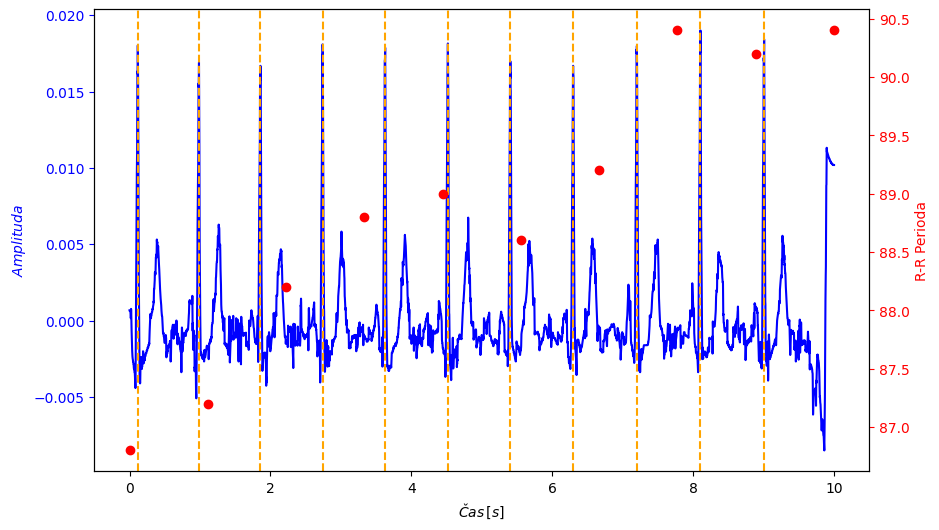

In [ ]:
# Zde napište váš kód
final_num_samples = np.linspace(0,len(y_axis), len(y_axis))
final_amplitude = np.max(y_axis) #ziskame maximalni amplitudu signalu
final_threshold = final_amplitude * 0.7
final_peaks_all = np.where(y_axis > final_threshold)[0]
min_distance_all = 1
final_peaks = []
final_idx = 0
above_threshold = False
for i, value in enumerate(y_axis): #prochazime jednotlive prvky od daneho indexu
    if value > final_threshold: #pokud dana hodnota odpovida peaku QRS komplexu
        if not above_threshold: #pokud jeste nejsme nad prahem
            above_threshold = True #nastavime prah na true
            final_idx = i #uchovame index zacatku odpovidajicih vzorku
    elif above_threshold: #pokud jiz jsme nad prahem
        above_threshold = False #nastavime prah na false
        final_max = np.argmax(np.abs(y_axis[final_idx:i])) + final_idx #nalezneme nejvyssi hodnotu v nami doposud nalezenych hodnotach odpovidajici peaku
        final_peaks.append(final_max) #vlozime index peaku do pole peaku

rr_intervals = np.diff(final_peaks) / fs * 100   # Prevod na sekundy
rr_times = (peaks[:-1] + peaks[1:]) / 2 / fs
rr_axis = np.linspace(0, 10, num=10)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(final_num_samples / 500, y_axis, 'b-')
ax1.set_xlabel('$Čas\,[s]$')
ax1.set_ylabel('$Amplituda$', color='b')
ax1.tick_params('y', colors='b')
for peak in final_peaks:
  plt.axvline(x=peak/ 500, linestyle='--', color='orange')
ax2 = ax1.twinx()
ax2.plot(rr_axis, rr_intervals, 'ro')  # cervene spojnice pro R-R intervaly
ax2.set_ylabel('R-R Perioda', color='r')
ax2.tick_params('y', colors='r')

plt.show()

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

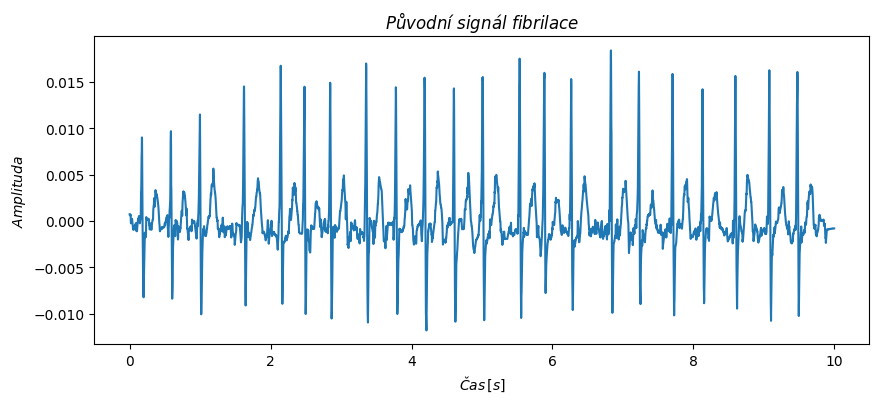

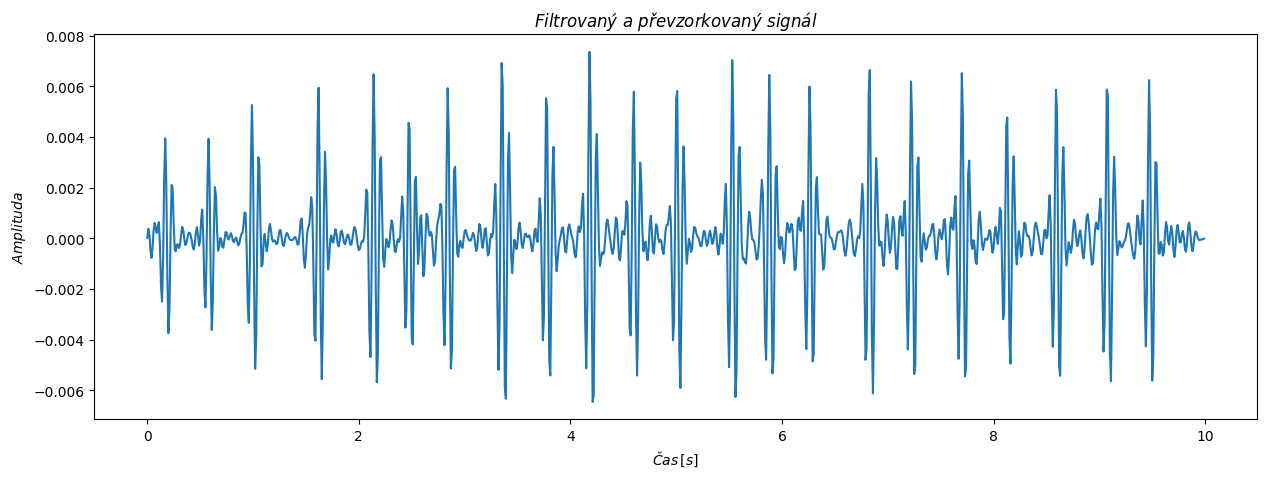

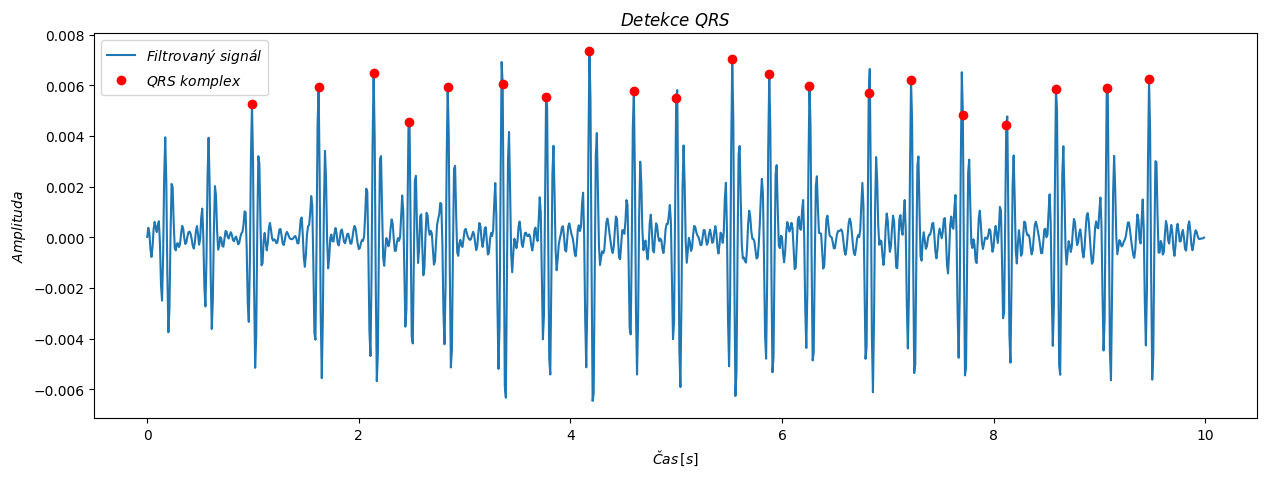

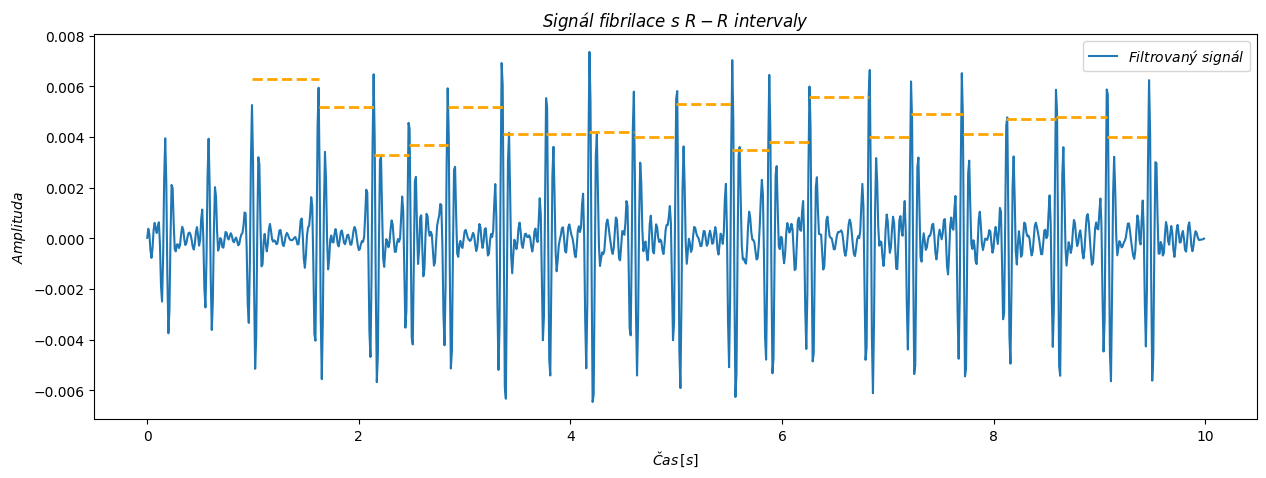

In [ ]:
# Zde napište váš kód
from scipy.signal import resample
fib, fs_fib = sf.read("FIB.wav") #nacteme FIB soubor
time_axis_fib = np.arange(len(fib)) / fs_fib

plt.figure(figsize=(10, 4))
plt.plot(time_axis_fib, fib)
plt.title('$Původní\ signál\ fibrilace$')
plt.xlabel('$Čas\,[s]$')
plt.ylabel('$Amplituda$')
plt.show()

fib_target_fs = 100 #prevzorkujeme siognal na 100 Hz
fib_num_samples_target = int(len(fib) * (fib_target_fs / fs_fib)) #pocet vzorku v cilove frekvenci

fib_resampled = resample(fib, fib_num_samples_target)

nyq_fib = 0.5 * fib_target_fs  # Nyquistova frekvence
low_fib = 10 / nyq_fib
high_fib = 20 / nyq_fib
b, a = butter(4, [low_fib, high_fib], btype='band') #ziskame koef a, b pro filtraci

fib_filtered = filtfilt(b, a, fib_resampled) #prefiltrujeme

t_resampled = np.arange(len(fib_filtered)) / fib_target_fs #osa x pro zpracopvany signal


plt.figure(figsize=(15, 5))
plt.plot(t_resampled, fib_filtered)
plt.title('$Filtrovaný\ a\ převzorkovaný\ signál$')
plt.xlabel('$Čas\,[s]$')
plt.ylabel('$Amplituda$')
plt.show()

fib_amplitude = np.max(fib_filtered) #ziskame max amplitudu
fib_threshold = 0.6 * fib_amplitude #nastavime prah
fib_index = 0
fib_above = False
fib_peaks = []

#ziskame QRS komplexy
for i, value in enumerate(fib_filtered): #prochazime jednotlive prvky od daneho indexu
    if value > np.abs(fib_threshold): #pokud dana hodnota odpovida peaku QRS komplexu
        if not fib_above: #pokud jeste nejsme nad prahem
            fib_above = True #nastavime prah na true
            fib_index = i #uchovame index zacatku odpovidajicih vzorku
    elif fib_above: #pokud jiz jsme nad prahem
        fib_above = False #nastavime prah na false
        fib_temp = np.argmax(np.abs(y_axis[fib_index:i])) + fib_index #nalezneme nejvyssi hodnotu v nami doposud nalezenych hodnotach odpovidajici peaku
        fib_peaks.append(fib_temp) #vlozime index peaku do pole peaku

plt.figure(figsize=(15, 5))
plt.plot(t_resampled, fib_filtered, label='$Filtrovaný\ signál$')
plt.plot(t_resampled[fib_peaks], fib_filtered[fib_peaks], 'ro', label='$QRS\ komplex$')
plt.title('$Detekce\ QRS$')
plt.xlabel('$Čas\,[s]$')
plt.ylabel('$Amplituda$')
plt.legend()
plt.show()

rr_intervals = np.diff(fib_peaks) / fib_target_fs / 100

# Vykreslení EKG signálu
plt.figure(figsize=(15, 5))
plt.plot(t_resampled, fib_filtered, label='$Filtrovaný\ signál$')

# Vykreslení hodnot R-R intervalů jako svislé čáry
for i in range(len(rr_intervals)):
    # Vykreslení čáry pro R-R interval na indexu QRS komplexu
    plt.plot([t_resampled[fib_peaks[i]], t_resampled[fib_peaks[i+1]]], [rr_intervals[i], rr_intervals[i]], linewidth=2, linestyle='--', color='orange')

plt.xlabel('$Čas\,[s]$')
plt.ylabel('$Amplituda$')
plt.title('$Signál\ fibrilace\ s\ R-R\ intervaly$')
plt.legend()
plt.show()


b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód